# 第5章　トレンドを理解する
## 5.2 日本経済と日経平均株価

In [1]:
states=['recover','growth','stable','bubble','reform','now']
dates=["1949/5/16","1954/12/1",'1972/1/1',"1986/12/1","1993/11/1","2016/9/30"]
print(states)

['recover', 'growth', 'stable', 'bubble', 'reform', 'now']


In [2]:
print(dates)

['1949/5/16', '1954/12/1', '1972/1/1', '1986/12/1', '1993/11/1', '2016/9/30']


In [3]:
import pandas_datareader.data as web
import numpy as np
end='2016/9/30'
n225 = web.DataReader("NIKKEI225", 'fred',"1949/5/16",end).NIKKEI225
print('rate of change')
for i in range(len(dates)-1):
    ave=n225[dates[i]:dates[i+1]].pct_change().mean()*250
    print(states[i],': %2.2f ％;'%(ave*100))
print 
print('volatility')
for i in range(len(dates)-1):
    vol=np.log(n225[dates[i]:dates[i+1]]).diff().std()*np.sqrt(250)
    print(states[i],': %2.2f ％;'%(vol*100))

rate of change
recover : 13.71 ％;
growth : 13.47 ％;
stable : 13.48 ％;
bubble : 3.49 ％;
reform : 2.16 ％;
volatility
recover : 22.99 ％;
growth : 14.45 ％;
stable : 12.64 ％;
bubble : 22.82 ％;
reform : 23.54 ％;


In [4]:
struct_break=[('1949/5/16','recv'),('1954/12/1','  growth'),
              ('1972/1/1','stable'),('1986/12/1','bubble'),('1991/3/1','      reform')]

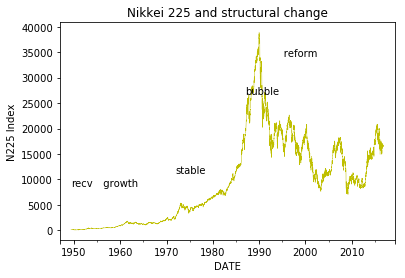

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
g=fig.add_subplot(1,1,1)
n225.plot(ax=g,style='y-',linewidth=0.5)
plt.ylabel('N225 Index')
for date, label in struct_break:
    g.annotate(label,xy=(date, n225.asof(date)+1000),
        xytext=(date,n225.asof(date)+10000),
        horizontalalignment='left',verticalalignment='top')
    g.set_xlim(['1947/1/1','2019/4/25'])

plt.title("Nikkei 225 and structural change")

## 5.4 日経平均株価の長期トレンドの把握

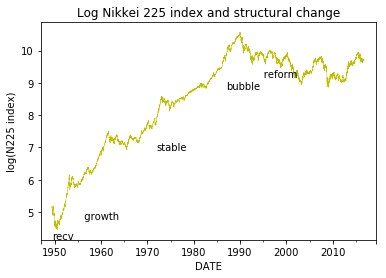

In [6]:
import numpy as np
fig=plt.figure()
g=fig.add_subplot(1,1,1)
ln_n225=np.log(n225)               #numpyのlogを利用
ln_n225.plot(ax=g,style='y-',linewidth=0.5)

for date, label in struct_break:
    g.annotate(label,xy=(date, ln_n225.asof(date)),
        xytext=(date,ln_n225.asof(date)-0.75),
        horizontalalignment='left',verticalalignment='top')
    g.set_xlim(['1947/1/1','2019/4/25'])
plt.ylabel('log(N225 index)')
plt.title("Log Nikkei 225 index and structural change")

In [7]:
import pandas_datareader.data as pdr
import numpy as np
for i in range(len(dates)-1):
    vol=np.log(n225[dates[i]:dates[i+1]]).diff().std()
    print(states[i],': %2.4f ;'%vol,)

recover : 0.0145 ;
growth : 0.0091 ;
stable : 0.0080 ;
bubble : 0.0144 ;
reform : 0.0149 ;


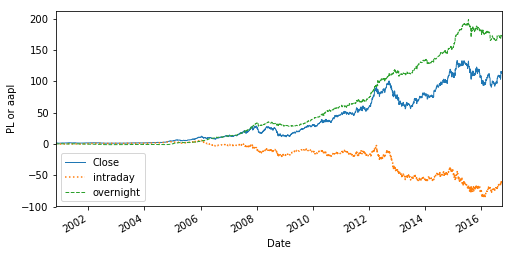

In [16]:
plt.figure(figsize=(8,4))
analysis= web.DataReader("aapl", 'google',"1990/1/1",end)
analysis['intraday']=0#None
analysis['overnight']=0#None
c0=analysis.Close.iloc[0]    
for i in range(1,len(analysis)):
    o=analysis.iloc[i,0]#列0
    c=analysis.iloc[i,3]#列3
    analysis.iloc[i,5]=c-o#列6　Intraday
    analysis.iloc[i,6]=o-c0#列７ overnight
    c0=c
analysis.Close.plot(label='Close',linewidth=1)
analysis.intraday.cumsum().plot(label="intraday",linestyle=":")
analysis.overnight.cumsum().plot(label="overnight",linestyle='--',linewidth=1)
plt.legend()
plt.ylabel('PL or aapl')
plt.legend(loc='lower left')

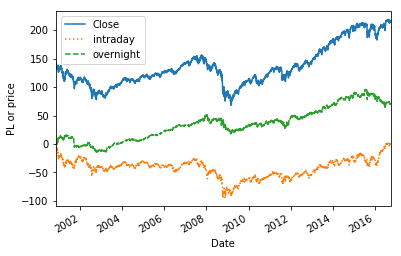

In [17]:
analysis= web.DataReader("SPY", 'google',"1993/1/29",end)
analysis['intraday']=0#None
analysis['overnight']=0#None
c0=analysis.Close.iloc[0]    
for i in range(1,len(analysis)):
    o=analysis.iloc[i,0]
    c=analysis.iloc[i,3]
    analysis.iloc[i,5]=c-o
    analysis.iloc[i,6]=o-c0
    c0=c
analysis.Close.plot(label='Close')
analysis.intraday.cumsum().plot(label='intraday',linestyle=':')
analysis.overnight.cumsum().plot(label='overnight',linestyle='--')
plt.legend()
plt.ylabel('PL or price')

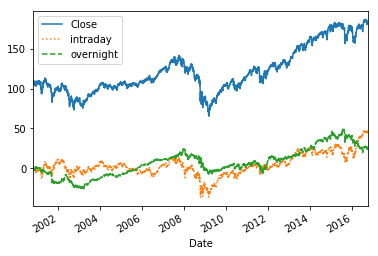

In [18]:
analysis= web.DataReader("DIA", 'google',"1993/1/29",end)
analysis['intraday']=0#None
analysis['overnight']=0#None
c0=analysis.Close.iloc[0]    
for i in range(1,len(analysis)):
    o=analysis.iloc[i,0]
    c=analysis.iloc[i,3]
    analysis.iloc[i,5]=c-o
    analysis.iloc[i,6]=o-c0
    c0=c
analysis.Close.plot(legend='Close')
analysis.intraday.cumsum().plot(legend="intraday",linestyle=':')
analysis.overnight.cumsum().plot(legend="overnight",linestyle='--')

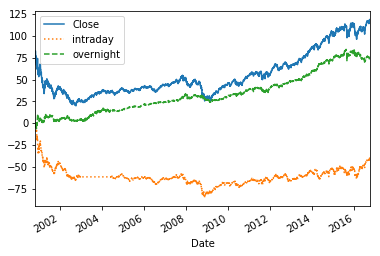

In [19]:
analysis= web.DataReader("QQQ", 'google',"1980/1/29",end)
analysis['intraday']=0#None
analysis['overnight']=0#None
c0=analysis.Close.iloc[0]    
for i in range(1,len(analysis)):
    o=analysis.iloc[i,0]
    c=analysis.iloc[i,3]
    analysis.iloc[i,5]=c-o
    analysis.iloc[i,6]=o-c0
    c0=c
analysis.Close.plot(legend='Close')
analysis.intraday.cumsum().plot(legend="intraday",linestyle=':')
analysis.overnight.cumsum().plot(legend="overnight",linestyle='--')